In [1195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

font_dirs = ['Lato']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Lato'

pd.set_option('display.float_format', '{:.5f}'.format)

colors = ['#1DB954', '#99FFB9']

%config InlineBackend.figure_format = 'retina'

In [1196]:
df = pd.read_csv('spotify.csv', encoding='latin1')
df.head(20)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40000,"390,470,936","30,716","196,631,588",...,684,62.00000,"17,598,718",114.00000,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90000,"323,703,884","28,113","174,597,137",...,3,67.00000,"10,422,430",111.00000,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40000,"601,309,283","54,331","211,607,669",...,536,136.00000,"36,321,847",172.00000,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90000,"2,031,280,633","269,802","136,569,078",...,"2,182",264.00000,"24,684,248",210.00000,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30000,"107,034,922","7,223","151,469,874",...,1,82.00000,"17,660,624",105.00000,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.10000,"670,665,438","105,892","175,421,034",...,"4,654",86.00000,"17,167,254",152.00000,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.20000,"900,158,751","73,118","201,585,714",...,429,168.00000,"48,197,850",154.00000,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.80000,"675,079,153","40,094","211,236,940",...,30,87.00000,"33,245,595",53.00000,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.70000,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.60000,"90,676,573","10,400","184,199,419",...,117,78.00000,"10,800,098",92.00000,"1,005,626",842,"3,679,709","666,302",NaN,1


In [1197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [1198]:
df.shape

(4600, 29)

In [1199]:
df.iloc[0:10]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40000,"390,470,936","30,716","196,631,588",...,684,62.00000,"17,598,718",114.00000,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90000,"323,703,884","28,113","174,597,137",...,3,67.00000,"10,422,430",111.00000,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40000,"601,309,283","54,331","211,607,669",...,536,136.00000,"36,321,847",172.00000,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90000,"2,031,280,633","269,802","136,569,078",...,"2,182",264.00000,"24,684,248",210.00000,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30000,"107,034,922","7,223","151,469,874",...,1,82.00000,"17,660,624",105.00000,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.10000,"670,665,438","105,892","175,421,034",...,"4,654",86.00000,"17,167,254",152.00000,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.20000,"900,158,751","73,118","201,585,714",...,429,168.00000,"48,197,850",154.00000,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.80000,"675,079,153","40,094","211,236,940",...,30,87.00000,"33,245,595",53.00000,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.70000,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.60000,"90,676,573","10,400","184,199,419",...,117,78.00000,"10,800,098",92.00000,"1,005,626",842,"3,679,709","666,302",NaN,1


In [1200]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
numeric_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric)
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'].replace(',', '', regex=True), downcast='integer')
df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int16         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

/var/folders/lv/vvf7kstx7655561b3lbhydv40000gn/T/ipykernel_40792/1487686018.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')


In [1201]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40000,390470936.00000,30716.00000,196631588.00000,...,684.00000,62.00000,17598718.00000,114.00000,18004655.00000,22931.00000,4818457.00000,2669262.00000,NaN,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90000,323703884.00000,28113.00000,174597137.00000,...,3.00000,67.00000,10422430.00000,111.00000,7780028.00000,28444.00000,6623075.00000,1118279.00000,NaN,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40000,601309283.00000,54331.00000,211607669.00000,...,536.00000,136.00000,36321847.00000,172.00000,5022621.00000,5639.00000,7208651.00000,5285340.00000,NaN,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,...,2182.00000,264.00000,24684248.00000,210.00000,190260277.00000,203384.00000,NaN,11822942.00000,NaN,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30000,107034922.00000,7223.00000,151469874.00000,...,1.00000,82.00000,17660624.00000,105.00000,4493884.00000,7006.00000,207179.00000,457017.00000,NaN,True


In [1202]:
df.isnull().any()

Track                         False
Album Name                    False
Artist                         True
Release Date                  False
ISRC                          False
All Time Rank                 False
Track Score                   False
Spotify Streams                True
Spotify Playlist Count         True
Spotify Playlist Reach         True
Spotify Popularity             True
YouTube Views                  True
YouTube Likes                  True
TikTok Posts                   True
TikTok Likes                   True
TikTok Views                   True
YouTube Playlist Reach         True
Apple Music Playlist Count     True
AirPlay Spins                  True
SiriusXM Spins                 True
Deezer Playlist Count          True
Deezer Playlist Reach          True
Amazon Playlist Count          True
Pandora Streams                True
Pandora Track Stations         True
Soundcloud Streams             True
Shazam Counts                  True
TIDAL Popularity            

In [1203]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [1204]:
df.isnull().sum() / len(df)

Track                        0.00000
Album Name                   0.00000
Artist                       0.00109
Release Date                 0.00000
ISRC                         0.00000
All Time Rank                0.00000
Track Score                  0.00000
Spotify Streams              0.02457
Spotify Playlist Count       0.01522
Spotify Playlist Reach       0.01565
Spotify Popularity           0.17478
YouTube Views                0.06696
YouTube Likes                0.06848
TikTok Posts                 0.25500
TikTok Likes                 0.21304
TikTok Views                 0.21326
YouTube Playlist Reach       0.21935
Apple Music Playlist Count   0.12196
AirPlay Spins                0.10826
SiriusXM Spins               0.46152
Deezer Playlist Count        0.20022
Deezer Playlist Reach        0.20174
Amazon Playlist Count        0.22935
Pandora Streams              0.24043
Pandora Track Stations       0.27565
Soundcloud Streams           0.72457
Shazam Counts                0.12543
T

In [1205]:
df = df.fillna(np.nan)

In [1206]:
df_spotify = df.drop(columns=['TIDAL Popularity', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'])
df_spotify.head(30)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40000,390470936.00000,30716.00000,196631588.00000,92.00000,84274754.00000,1713126.00000,5767700.00000,651565900.00000,5332281936.00000,150597040.00000,210.00000,2669262.00000,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90000,323703884.00000,28113.00000,174597137.00000,92.00000,116347040.00000,3486739.00000,674700.00000,35223547.00000,208339025.00000,156380351.00000,188.00000,1118279.00000,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40000,601309283.00000,54331.00000,211607669.00000,92.00000,122599116.00000,2228730.00000,3025400.00000,275154237.00000,3369120610.00000,373784955.00000,190.00000,5285340.00000,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,85.00000,1096100899.00000,10629796.00000,7189811.00000,1078757968.00000,14603725994.00000,3351188582.00000,394.00000,11822942.00000,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30000,107034922.00000,7223.00000,151469874.00000,88.00000,77373957.00000,3670188.00000,16400.00000,NaN,NaN,112763851.00000,182.00000,457017.00000,True
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.10000,670665438.00000,105892.00000,175421034.00000,83.00000,131148091.00000,1392593.00000,4202367.00000,214943489.00000,2938686633.00000,2867222632.00000,138.00000,4517131.00000,True
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.20000,900158751.00000,73118.00000,201585714.00000,86.00000,308723145.00000,4120760.00000,NaN,29584940.00000,534915313.00000,4601579812.00000,280.00000,9990302.00000,False
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.80000,675079153.00000,40094.00000,211236940.00000,92.00000,228382568.00000,1439495.00000,3500000.00000,338546668.00000,3804584163.00000,2112581620.00000,160.00000,6063523.00000,True
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.70000,1653018119.00000,1.00000,15.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.60000,90676573.00000,10400.00000,184199419.00000,86.00000,32735244.00000,988682.00000,325800.00000,121574500.00000,974656200.00000,174706874.00000,191.00000,666302.00000,True


In [1207]:
df_spotify = df_spotify[(df_spotify['Spotify Streams'] != 0) & (~df_spotify['Spotify Streams'].isna())]
df_spotify

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40000,390470936.00000,30716.00000,196631588.00000,92.00000,84274754.00000,1713126.00000,5767700.00000,651565900.00000,5332281936.00000,150597040.00000,210.00000,2669262.00000,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90000,323703884.00000,28113.00000,174597137.00000,92.00000,116347040.00000,3486739.00000,674700.00000,35223547.00000,208339025.00000,156380351.00000,188.00000,1118279.00000,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40000,601309283.00000,54331.00000,211607669.00000,92.00000,122599116.00000,2228730.00000,3025400.00000,275154237.00000,3369120610.00000,373784955.00000,190.00000,5285340.00000,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,85.00000,1096100899.00000,10629796.00000,7189811.00000,1078757968.00000,14603725994.00000,3351188582.00000,394.00000,11822942.00000,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30000,107034922.00000,7223.00000,151469874.00000,88.00000,77373957.00000,3670188.00000,16400.00000,NaN,NaN,112763851.00000,182.00000,457017.00000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.40000,305049963.00000,65770.00000,5103054.00000,71.00000,149247747.00000,1397590.00000,48370.00000,20202000.00000,143934379.00000,53016.00000,3.00000,656337.00000,True
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.40000,52282360.00000,4602.00000,1449767.00000,56.00000,943920245.00000,5347766.00000,NaN,1721.00000,19935.00000,24973048.00000,1.00000,193590.00000,False
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.40000,189972685.00000,72066.00000,6704802.00000,65.00000,201027333.00000,1081402.00000,7596.00000,5288677.00000,36849005.00000,29253152.00000,19.00000,1135998.00000,True
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.40000,145467020.00000,14037.00000,7387064.00000,66.00000,1118595159.00000,3868828.00000,11433.00000,2534831.00000,37757301.00000,25150516.00000,1.00000,448292.00000,False


### Use df_spotify for dataset

In [1208]:
df_spotify.describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts
count,4487,4487.00000,4487.00000,4487.00000,4467.00000,4465.00000,3781.00000,4218.00000,4211.00000,3406.00000,3598.00000,3597.00000,3557.00000,4028.00000,3974.00000
mean,2021-01-19 04:12:34.178738432,2293.98284,41.75933,447387314.74593,60216.06044,23672537.00067,63.70272,395635678.29730,2922137.86844,917591.12272,111561575.15898,1145629575.96358,343388996.70846,54.68694,2411856.39708
min,1987-07-21 00:00:00,1.00000,19.40000,1071.00000,1.00000,1.00000,1.00000,913.00000,25.00000,1.00000,3.00000,19.00000,1.00000,1.00000,1.00000
25%,2019-06-29 12:00:00,1145.50000,23.30000,70386298.50000,7291.50000,5083474.00000,61.00000,40266352.75000,409749.50000,38150.75000,5842730.50000,59075543.00000,11769967.00000,10.00000,234547.50000
50%,2022-05-20 00:00:00,2294.00000,29.90000,239850720.00000,33151.00000,13549250.00000,67.00000,145326185.50000,1254450.00000,181077.50000,26576921.50000,265917250.00000,97746040.00000,28.00000,858332.00000
75%,2023-08-11 00:00:00,3440.00000,44.40000,628363805.00000,87095.00000,30225538.00000,73.00000,459117129.75000,3575525.50000,785268.75000,93234069.00000,907498533.00000,309611524.00000,70.00000,2685523.50000
max,2024-06-14 00:00:00,4998.00000,725.40000,4281468720.00000,590392.00000,262343414.00000,96.00000,16322756555.00000,62311179.00000,37726462.00000,23474223833.00000,233232311463.00000,7289707052.00000,859.00000,44842636.00000
std,NaN,1321.70049,38.52850,538443905.28127,71286.91858,29767937.31158,15.88067,693966488.81731,4589279.04347,2315329.66598,548728222.80636,5860664607.94469,670830159.89261,71.66100,4000183.20385


In [1209]:
df_spotify[df_spotify['Spotify Streams'] <= 10000]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track
61,Very Cute Melody by Marimba Tone (39813),Very Cute Melody by Marimba Tone (39813),mitsu sound,2023-12-31,RUA1H2406425,62,186.50000,1384.00000,2.00000,801.00000,NaN,222076.00000,5430.00000,5013500.00000,605320683.00000,8811416708.00000,NaN,NaN,NaN,False
73,The Way We Move - Extended Mix,The Way We Move,PowerDress,2023-03-10,UKACT2330463,74,173.60000,7909.00000,38.00000,15023.00000,4.00000,1999374091.00000,5708577.00000,NaN,NaN,NaN,NaN,NaN,1412.00000,False
82,Peekaboo,Glide - Single,Dave Angel,2023-01-27,GBLTF2300027,83,167.20000,8082.00000,63.00000,32758.00000,NaN,2055940513.00000,4150967.00000,NaN,NaN,NaN,NaN,1.00000,442.00000,False
131,Looking Like a Wow End of Year 2023,Looking Like a Wow,WasteLand,2023-12-10,GXBAV2381801,132,130.70000,8327.00000,3.00000,8.00000,NaN,NaN,NaN,4200000.00000,3646489.00000,73318253.00000,NaN,NaN,522.00000,False
356,6. A.M.,Motion is Emotion,Azul,2022-10-07,ES40B2200055,356,81.10000,1186.00000,5.00000,30.00000,NaN,1231300374.00000,3158558.00000,NaN,NaN,NaN,248653921.00000,NaN,NaN,False
468,Sabka Malik Ek,Sabka Malik Ek,Dada Black Sheep,2022-08-12,FR9W12228852,467,71.30000,2754.00000,22.00000,441.00000,NaN,1197426502.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
911,Raja Ji Ke Dilwa,Raja Ji Ke Dilwa,Pawan Singh,2023-12-19,INM1Q2326022,909,50.60000,4283.00000,1.00000,3.00000,NaN,224819919.00000,1249285.00000,NaN,NaN,NaN,29757537.00000,NaN,NaN,False
1010,LEATHER,LEATHER,MAKAELA,2023-01-27,QZJG52355895,1000,47.90000,1696.00000,NaN,NaN,NaN,604258394.00000,1611760.00000,NaN,NaN,NaN,NaN,NaN,NaN,True
1069,Poor People We,Poor People We,Harp and a monkey,2022-11-28,UKXN22273282,1062,46.50000,1071.00000,6.00000,1694.00000,NaN,654777639.00000,NaN,NaN,NaN,NaN,176.00000,NaN,23.00000,False
1273,Hello,Hello,Muramatsu Karaoke,2015-12-04,USE831522275,1268,42.00000,3531.00000,2.00000,4.00000,NaN,3250879013.00000,19819631.00000,NaN,NaN,NaN,2025160205.00000,NaN,NaN,False


In [1210]:
df_spotify['Release Year'] = df_spotify['Release Date'].dt.year
df_spotify.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40000,390470936.00000,30716.00000,196631588.00000,...,84274754.00000,1713126.00000,5767700.00000,651565900.00000,5332281936.00000,150597040.00000,210.00000,2669262.00000,False,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90000,323703884.00000,28113.00000,174597137.00000,...,116347040.00000,3486739.00000,674700.00000,35223547.00000,208339025.00000,156380351.00000,188.00000,1118279.00000,True,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40000,601309283.00000,54331.00000,211607669.00000,...,122599116.00000,2228730.00000,3025400.00000,275154237.00000,3369120610.00000,373784955.00000,190.00000,5285340.00000,False,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,...,1096100899.00000,10629796.00000,7189811.00000,1078757968.00000,14603725994.00000,3351188582.00000,394.00000,11822942.00000,False,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30000,107034922.00000,7223.00000,151469874.00000,...,77373957.00000,3670188.00000,16400.00000,NaN,NaN,112763851.00000,182.00000,457017.00000,True,2024


<function matplotlib.pyplot.show(close=None, block=None)>

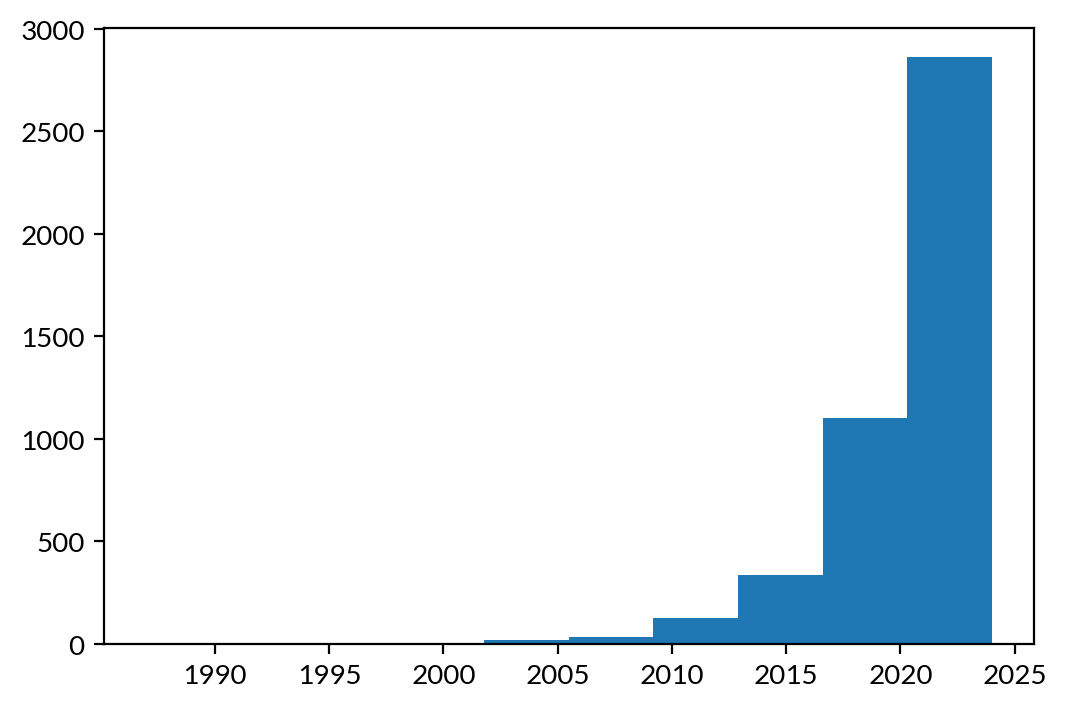

In [1211]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_spotify['Release Year'])
plt.show

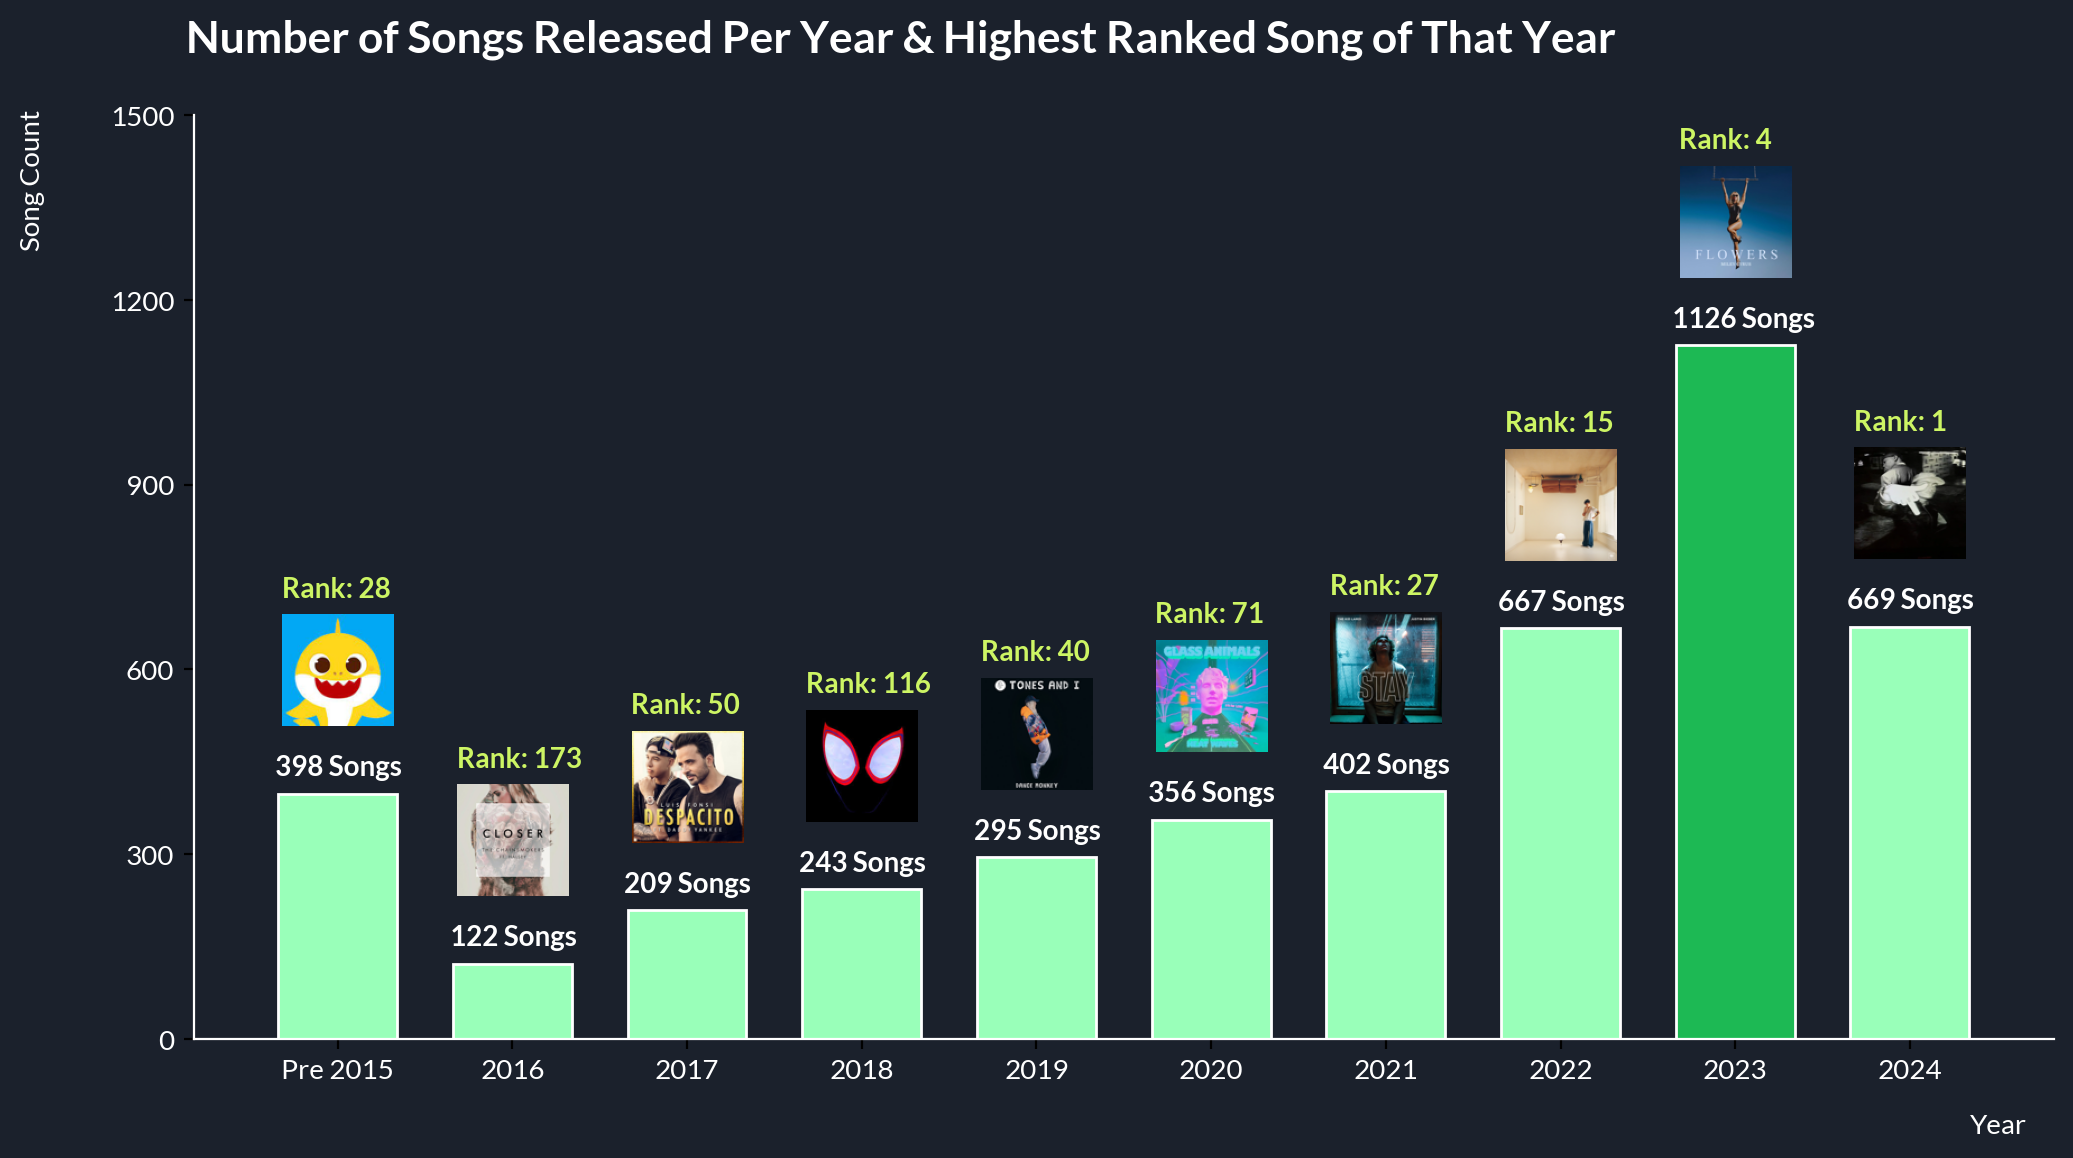

In [1212]:
pre_2015 = df_spotify[df_spotify['Release Year'] <= 2015]
six = df_spotify[df_spotify['Release Year'] == 2016]
seven = df_spotify[df_spotify['Release Year'] == 2017]
eight = df_spotify[df_spotify['Release Year'] == 2018]
nine = df_spotify[df_spotify['Release Year'] == 2019]
ten = df_spotify[df_spotify['Release Year'] == 2020]
one = df_spotify[df_spotify['Release Year'] == 2021]
two = df_spotify[df_spotify['Release Year'] == 2022]
three = df_spotify[df_spotify['Release Year'] == 2023]
four = df_spotify[df_spotify['Release Year'] == 2024]

song_count = pd.Series([len(pre_2015), len(six), len(seven), len(eight), len(nine), len(ten), len(one), len(two), len(three), len(four)])
x_song_count = np.arange(len(song_count))

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x_song_count, song_count, width=0.68, color=[colors[0] if v == max(song_count) else colors[1] for i, v in enumerate(song_count)], edgecolor='white')

for i, label in enumerate(range(len(song_count))):
    ax.annotate(f"{song_count.iloc[i]} Songs", (i-0.36, song_count.iloc[i]+30), size=10, annotation_clip=False, color='white', fontweight='bold')

rank = pd.Series([min(pre_2015['All Time Rank']), min(six['All Time Rank']), min(seven['All Time Rank']), min(eight['All Time Rank']), min(nine['All Time Rank']), min(ten['All Time Rank']), min(one['All Time Rank']), min(two['All Time Rank']), min(three['All Time Rank']), min(four['All Time Rank'])])
for i, label in enumerate(range(len(rank))):
    ax.annotate(f"Rank: {rank.iloc[i]}", (i-0.32, song_count.iloc[i]+320), size=10, annotation_clip=False, color='#cdf564', fontweight='bold')

images = ['./songs/baby_shark.jpeg', './songs/closer.jpeg', './songs/despacito.jpeg', './songs/sunflower.jpeg', './songs/dance_monkey.jpeg', './songs/heat_waves.webp', './songs/stay.jpeg', './songs/as_it_was.jpeg', './songs/flowers.jpg', './songs/mmb.webp']
for i, image in enumerate(images):
    img = plt.imread(image)
    img = np.array(Image.open(image).resize((100, 100)))
    imagebox = OffsetImage(img, zoom=0.4)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (i, song_count.iloc[i] + 200), frameon=False)
    ax.add_artist(ab)

ax.set_xlabel('Year', color='white')
ax.set_xticks(x_song_count)
ax.set_xticklabels(['Pre 2015',2016,2017,2018,2019,2020,2021,2022,2023,2024], color='white')
ax.set_ylabel('Song Count', color='white')
ax.set_yticks(np.arange(0, 1501, 300))
ax.set_yticklabels(np.arange(0, 1501, 300), color='white')
ax.set_title('Number of Songs Released Per Year & Highest Ranked Song of That Year', color='white', fontsize=16, fontweight='bold', x=0.38, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.97, -0.08)
ax.yaxis.set_label_coords(-0.08, 0.93)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
fig.savefig('song_release_rank.png', dpi=300, bbox_inches='tight')
plt.show()

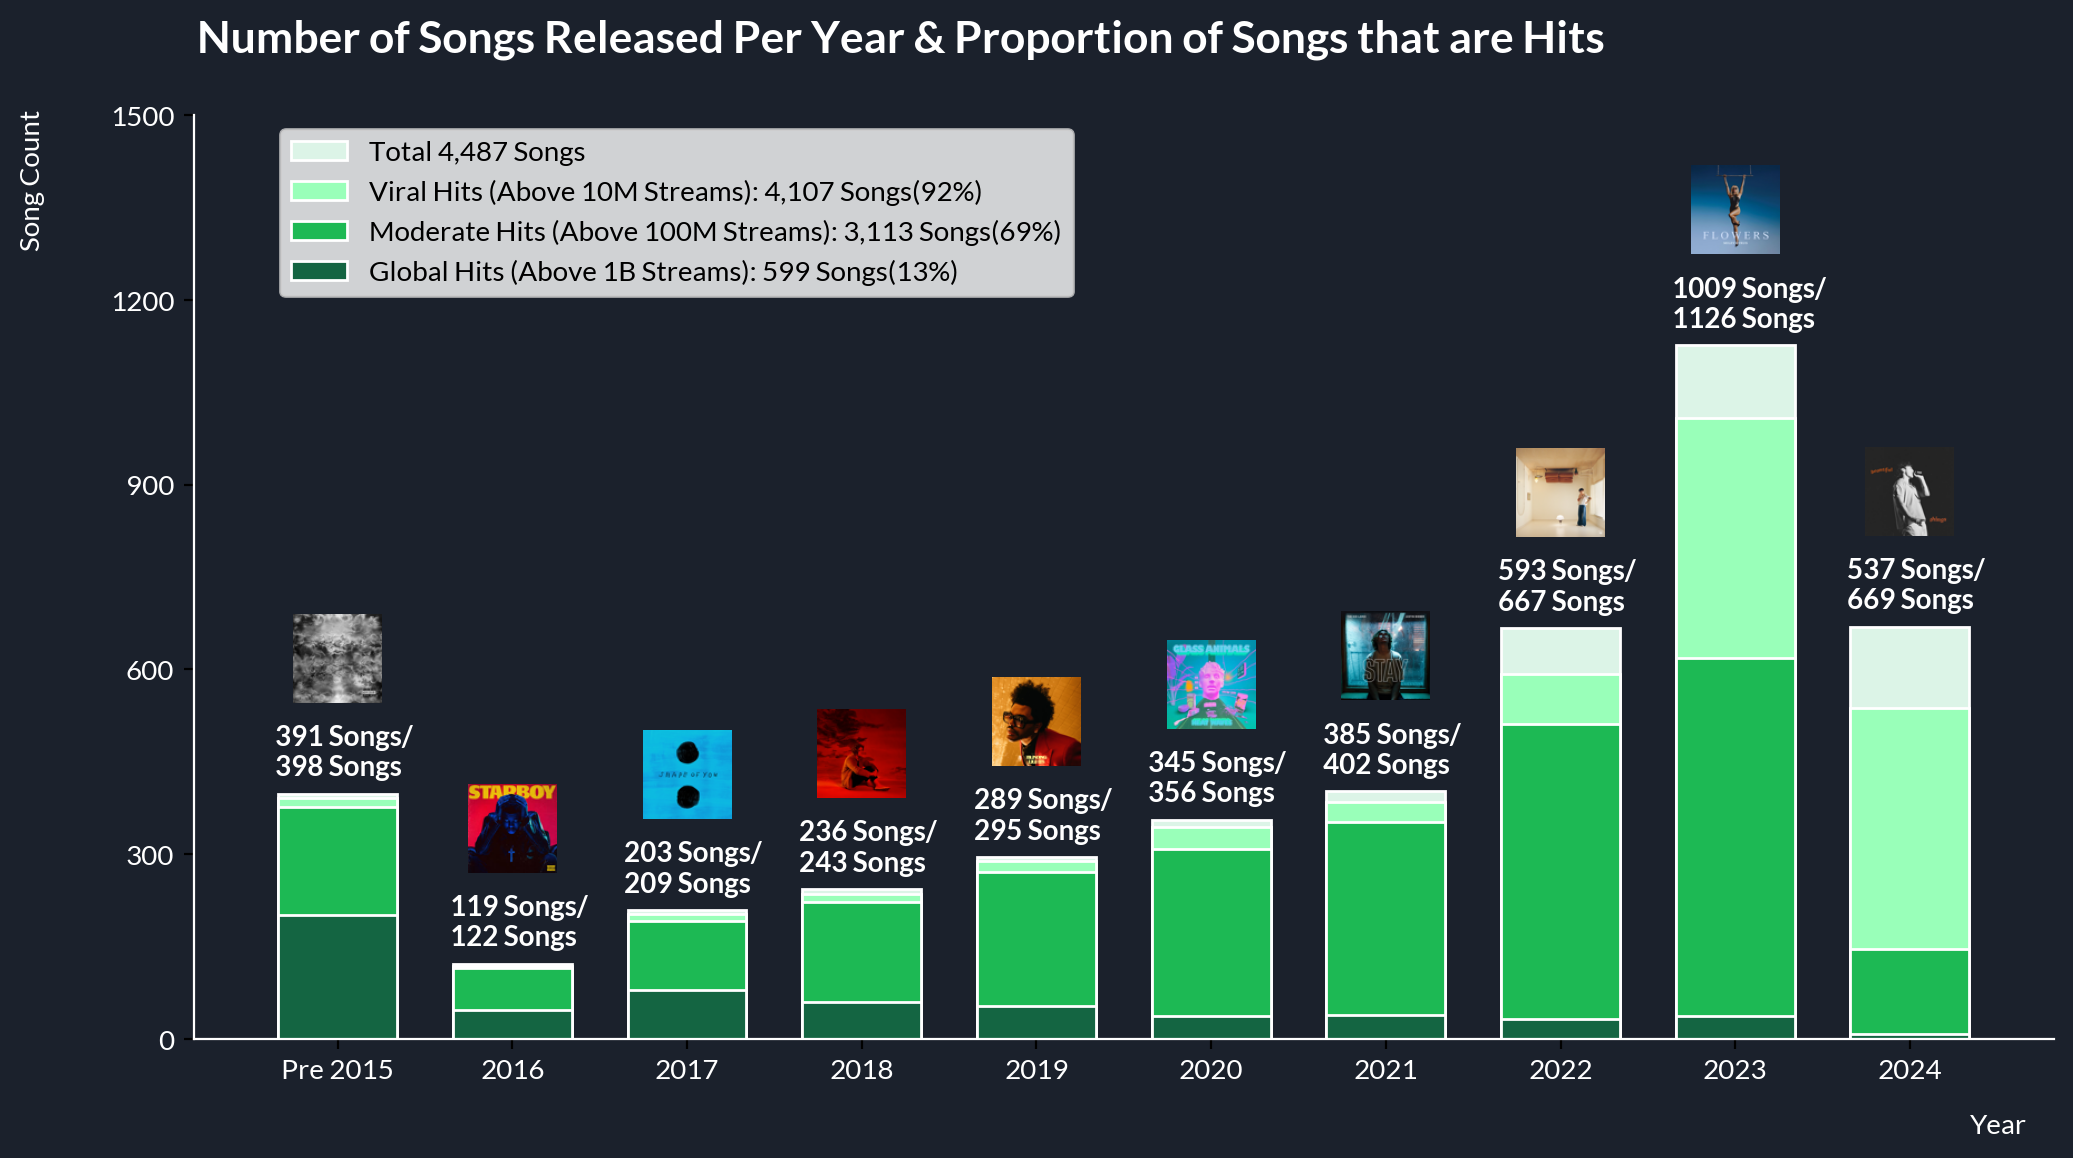

In [1213]:
pre_2015 = df_spotify[df_spotify['Release Year'] <= 2015]
six = df_spotify[df_spotify['Release Year'] == 2016]
seven = df_spotify[df_spotify['Release Year'] == 2017]
eight = df_spotify[df_spotify['Release Year'] == 2018]
nine = df_spotify[df_spotify['Release Year'] == 2019]
ten = df_spotify[df_spotify['Release Year'] == 2020]
one = df_spotify[df_spotify['Release Year'] == 2021]
two = df_spotify[df_spotify['Release Year'] == 2022]
three = df_spotify[df_spotify['Release Year'] == 2023]
four = df_spotify[df_spotify['Release Year'] == 2024]

song_count = pd.Series([len(pre_2015), len(six), len(seven), len(eight), len(nine), len(ten), len(one), len(two), len(three), len(four)])
b_song_count = pd.Series([len(pre_2015[pre_2015['Spotify Streams'] >= 1000000000]), len(six[six['Spotify Streams'] >= 1000000000]), len(seven[seven['Spotify Streams'] >= 1000000000]), len(eight[eight['Spotify Streams'] >= 1000000000]), len(nine[nine['Spotify Streams'] >= 1000000000]), len(ten[ten['Spotify Streams'] >= 1000000000]), len(one[one['Spotify Streams'] >= 1000000000]), len(two[two['Spotify Streams'] >= 1000000000]), len(three[three['Spotify Streams'] >= 1000000000]), len(four[four['Spotify Streams'] >= 1000000000])])
h_song_count = pd.Series([len(pre_2015[pre_2015['Spotify Streams'] >= 100000000]), len(six[six['Spotify Streams'] >= 100000000]), len(seven[seven['Spotify Streams'] >= 100000000]), len(eight[eight['Spotify Streams'] >= 100000000]), len(nine[nine['Spotify Streams'] >= 100000000]), len(ten[ten['Spotify Streams'] >= 100000000]), len(one[one['Spotify Streams'] >= 100000000]), len(two[two['Spotify Streams'] >= 100000000]), len(three[three['Spotify Streams'] >= 100000000]), len(four[four['Spotify Streams'] >= 100000000])])
t_song_count = pd.Series([len(pre_2015[pre_2015['Spotify Streams'] >= 10000000]), len(six[six['Spotify Streams'] >= 10000000]), len(seven[seven['Spotify Streams'] >= 10000000]), len(eight[eight['Spotify Streams'] >= 10000000]), len(nine[nine['Spotify Streams'] >= 10000000]), len(ten[ten['Spotify Streams'] >= 10000000]), len(one[one['Spotify Streams'] >= 10000000]), len(two[two['Spotify Streams'] >= 10000000]), len(three[three['Spotify Streams'] >= 10000000]), len(four[four['Spotify Streams'] >= 10000000])])
x_song_count = np.arange(len(song_count))

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x_song_count, song_count, width=0.68, color='#DCF4E7', edgecolor='white', label='Total 4,487 Songs')
ax.bar(x_song_count, t_song_count, width=0.68, color=colors[1], edgecolor='white', label='Viral Hits (Above 10M Streams): 4,107 Songs(92%)')
ax.bar(x_song_count, h_song_count, width=0.68, color=colors[0], edgecolor='white', label='Moderate Hits (Above 100M Streams): 3,113 Songs(69%)')
ax.bar(x_song_count, b_song_count, width=0.68, color='#146542', edgecolor='white', label='Global Hits (Above 1B Streams): 599 Songs(13%)')

for i, label in enumerate(range(len(song_count))):
    ax.annotate(f"{t_song_count.iloc[i]} Songs/\n{song_count.iloc[i]} Songs", (i-0.36, song_count.iloc[i]+30), size=10, annotation_clip=False, color='white', fontweight='bold')

images = ['./songs/sweater_weather.jpeg', './songs/starboy.jpeg', './songs/shape_of_you.jpeg', './songs/someone_you_loved.jpeg', './songs/blinding_lights.jpeg', './songs/heat_waves.webp', './songs/stay.jpeg', './songs/as_it_was.jpeg', './songs/flowers.jpg', './songs/beautiful_things.jpeg']
for i, image in enumerate(images):
    img = plt.imread(image)
    img = np.array(Image.open(image).resize((80, 80)))
    imagebox = OffsetImage(img, zoom=0.4)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (i, song_count.iloc[i] + 220), frameon=False)
    ax.add_artist(ab)

ax.set_xlabel('Year', color='white')
ax.set_xticks(x_song_count)
ax.set_xticklabels(['Pre 2015',2016,2017,2018,2019,2020,2021,2022,2023,2024], color='white')
ax.set_ylabel('Song Count', color='white')
ax.set_yticks(np.arange(0, 1501, 300))
ax.set_yticklabels(np.arange(0, 1501, 300), color='white')
ax.set_title('Number of Songs Released Per Year & Proportion of Songs that are Hits', color='white', fontsize=16, fontweight='bold', x=0.38, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.97, -0.08)
ax.yaxis.set_label_coords(-0.08, 0.93)
ax.set_facecolor(color='#1b212c')
plt.legend(bbox_to_anchor=(0.48, 1))
fig.patch.set_facecolor('#1b212c')
fig.savefig('song_release_streams.png', dpi=300, bbox_inches='tight')
plt.show()

In [1214]:
len(df_spotify[df_spotify['Spotify Streams'] >= 1000000000])

599

In [1215]:
name = three[three['Spotify Streams'] == max(three['Spotify Streams'])]
name

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,...,1096100899.00000,10629796.00000,7189811.00000,1078757968.00000,14603725994.00000,3351188582.00000,394.00000,11822942.00000,False,2023
3758,Flowers,Flowers (Official Video),Miley Cyrus,2023-01-12,USSM22202811,3752,22.10000,2031280633.00000,1.00000,92.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2023


In [1216]:
sorted_df = four.sort_values(by='Spotify Streams', ascending=False)
sorted_df.head(30)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
71,In the End,Papercuts,Linkin Park,2024-04-12,USWB11201322,72,174.80000,2045512421.00000,97.00000,488602.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2024
47,Danza Kuduro - Cover,GEKIATU BEST AGE SONG - CLUB SONG,MUSIC LAB JPN,2024-05-02,TCJPA2415647,48,204.40000,1655575417.00000,9.00000,85.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024
58,Danza Kuduro - Cover,YOUGAKU MORIMORI CLUB MEDLEY,MUSIC LAB JPN,2024-04-29,TCJPA2420090,59,190.00000,1655575417.00000,1.00000,3.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024
22,Danza Kuduro - Cover,CLUB DE YOKUKIKU YOUGAKU MEDLEY,MUSIC LAB JPN,2024-05-21,TCJPA2445163,23,279.00000,1655575417.00000,10.00000,655.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.70000,1653018119.00000,1.00000,15.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024
30,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...,LOVE BGM JPN,2024-05-14,TCJPA2406007,31,249.80000,1645079292.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024
993,Calm Down Baby,Calm Down Baby - Single,DJ Laxman,2024-01-12,FR10S2458617,989,48.40000,1389772733.00000,1.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,False,2024
1585,Stand by Me,Don't Play That Song,Ben King,2024-01-05,DETT12295003,1577,36.90000,1094052047.00000,1.00000,3.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2024
29,Numb / Encore,Papercuts,JAY-Z,2024-04-12,USWB12400678,30,256.00000,1003215671.00000,128.00000,485454.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4474248.00000,True,2024
1759,Lalala,Lalala - Single,ati2x06,2024-01-17,ES64E2455099,1751,34.80000,966112900.00000,1.00000,124.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2024


In [1217]:
pre_2000 = df_spotify[df_spotify['Release Year'] <= 2000]
pre_2000

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
1806,In the End,Hybrid Theory (Bonus Track Version),Linkin Park,2000-10-24,USWB10002407,1803,34.30000,2045512421.00000,324745.00000,99290558.00000,...,2375021286.00000,17765456.00000,522553.00000,63993059.00000,729532806.00000,1256171581.00000,16.00000,26145.00000,False,2000
2107,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-01-01,USSM19400325,2097,31.50000,1810649765.00000,109411.00000,45003974.00000,...,824500156.00000,7455155.00000,18894720.00000,1432227925.00000,15963128797.00000,29891688.00000,418.00000,6531412.00000,False,1994
2817,The Real Slim Shady,The Source Hip-Hop Hits Vol. 4,Eminem,2000-01-01,USIR10000448,2796,26.50000,1798020679.00000,352947.00000,75283550.00000,...,961666231.00000,7927293.00000,74682.00000,86740640.00000,771015965.00000,568968886.00000,93.00000,6637985.00000,True,2000
3729,Californication,Californication (Deluxe Version),Red Hot Chili Peppers,1999-06-08,USWB19900690,3730,22.20000,1405353677.00000,276377.00000,115315508.00000,...,1518596886.00000,7781636.00000,52722.00000,16291854.00000,226008149.00000,595631730.00000,2.00000,NaN,False,1999
3978,Sweet Child O' Mine,Appetite For Destruction,Guns N' Roses,1987-07-21,USGF18714809,3931,21.50000,1879386440.00000,295491.00000,96032046.00000,...,2007460784.00000,11222080.00000,623935.00000,57957597.00000,673282408.00000,743526260.00000,212.00000,10345515.00000,True,1987
4167,Beautiful Girls,Groove So Much !,Sean Kingston,1998-04-03,USSM10701781,4155,20.80000,178339925.00000,189706.00000,77373837.00000,...,1499385808.00000,12220360.00000,7779004.00000,94939587.00000,803719645.00000,193830298.00000,100.00000,4403782.00000,False,1998
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,USGF19942501,4510,19.60000,2021910364.00000,410054.00000,113406994.00000,...,348081676.00000,4710499.00000,264172.00000,95247745.00000,720283921.00000,837901.00000,287.00000,12775440.00000,False,1991


In [1218]:
pre_2005 = df_spotify[df_spotify['Release Year'] <= 2005]
pre_2005

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
1806,In the End,Hybrid Theory (Bonus Track Version),Linkin Park,2000-10-24,USWB10002407,1803,34.30000,2045512421.00000,324745.00000,99290558.00000,...,2375021286.00000,17765456.00000,522553.00000,63993059.00000,729532806.00000,1256171581.00000,16.00000,26145.00000,False,2000
1922,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,2005-01-01,USA3D0700101,1918,33.10000,16326628.00000,12434.00000,3542140.00000,...,7603329.00000,122780.00000,35323801.00000,18422696340.00000,214843956590.00000,13579446.00000,9.00000,632600.00000,False,2005
2024,Yeah! (feat. Lil Jon & Ludacris),Kings Of Crunk (Special Edition),USHER,2004-01-01,USAR10301423,2020,32.10000,1307469137.00000,255327.00000,107143110.00000,...,1200224642.00000,8294174.00000,416052.00000,131333791.00000,1599320816.00000,163326719.00000,289.00000,15485233.00000,False,2004
2107,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-01-01,USSM19400325,2097,31.50000,1810649765.00000,109411.00000,45003974.00000,...,824500156.00000,7455155.00000,18894720.00000,1432227925.00000,15963128797.00000,29891688.00000,418.00000,6531412.00000,False,1994
2221,"Lose Yourself - From ""8 Mile"" Soundtrack",8 Mile,Eminem,2002-10-29,USIR10211559,2222,30.40000,2194935773.00000,345119.00000,97808878.00000,...,1360758976.00000,9892246.00000,69588.00000,1476678.00000,20114190.00000,339086425.00000,252.00000,10419522.00000,True,2002
2269,Hips Don't Lie (feat. Wyclef Jean),Oral Fixation Vol. 2,Shakira,2005-01-01,USSM10600677,2257,30.10000,1631152967.00000,261693.00000,142426948.00000,...,1663636127.00000,9345192.00000,2393712.00000,306451930.00000,2939466349.00000,1850350995.00000,261.00000,6770784.00000,False,2005
2483,Numb,Meteora,Linkin Park,2003-03-24,USWB10300474,2472,28.70000,1720830668.00000,270810.00000,75602131.00000,...,2450982330.00000,15462896.00000,440206.00000,37487815.00000,490782499.00000,907757737.00000,5.00000,NaN,False,2003
2579,Dilemma,Nellyville (Explicit Version),Nelly,2002-06-25,USUR10200370,2573,27.90000,859999247.00000,170136.00000,65334656.00000,...,1639732381.00000,8770296.00000,199632.00000,36725930.00000,368297203.00000,965108329.00000,116.00000,10809090.00000,True,2002
2642,Viva La Vida,Meu Pai ï¿½ï¿½ do,Coldplay,2005-09-21,GBAYE0800265,2619,27.50000,2102223775.00000,335772.00000,128128093.00000,...,1412127488.00000,8707376.00000,1619542.00000,244469571.00000,2264301241.00000,1233854544.00000,93.00000,54637.00000,False,2005
2656,'Till I Collapse,The Eminem Show,Eminem,2002-05-26,USIR10211066,2651,27.40000,1958809069.00000,282888.00000,74055843.00000,...,1463549979.00000,10918289.00000,41045.00000,6151095.00000,54356279.00000,324314535.00000,83.00000,4812702.00000,True,2002


In [1219]:
pre_2010 = df_spotify[df_spotify['Release Year'] <= 2010]
pre_2010

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
792,Love The Way You Lie,538 Hitzone 55,Eminem,2010-01-01,USUM71015397,784,54.70000,1532052160.00000,236943.00000,76167038.00000,...,3009144927.00000,15864764.00000,208118.00000,23435916.00000,223136013.00000,254272987.00000,84.00000,10011625.00000,True,2010
925,Waka Waka (This Time for Africa) [The Official...,So Fresh The Hits of Summer 2011 + The Best Of...,Shakira,2010-01-01,USSM11001353,921,50.40000,829352129.00000,159324.00000,36048887.00000,...,4062829308.00000,23606907.00000,2250587.00000,417038157.00000,5938511405.00000,269751922.00000,109.00000,NaN,False,2010
1119,Pumped Up Kicks,Pumped up Kicks,Foster The People,2010-01-01,USSM11002931,1113,45.10000,1791778314.00000,344490.00000,131726745.00000,...,599930123.00000,5713061.00000,786192.00000,342804034.00000,2757623631.00000,19949320.00000,195.00000,16415660.00000,False,2010
1136,Axel F,Best of Crazy Hits,Crazy Frog,2009-12-11,DEAF71578230,1134,44.70000,178536020.00000,870.00000,142649.00000,...,5049428366.00000,20305999.00000,NaN,NaN,NaN,204191511.00000,1.00000,2967336.00000,False,2009
1343,Baby,R&B Collection 2011,Justin Bieber,2010-01-01,USUM70919263,1337,40.70000,952635214.00000,136655.00000,76732478.00000,...,3312260344.00000,26679549.00000,247185.00000,131384412.00000,1174409085.00000,863841137.00000,90.00000,4413818.00000,False,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,Taboo,Meet the Orphans (Deluxe Edition),Don Omar,2010-01-01,USUM71025734,4451,19.80000,210904340.00000,32972.00000,17062785.00000,...,1096124254.00000,3571813.00000,4471.00000,2661983.00000,22688824.00000,159360588.00000,11.00000,1655972.00000,False,2010
4471,Snow (Hey Oh),Stadium Arcadium (U.S. Version),Red Hot Chili Peppers,2006-05-09,USWB10601591,4442,19.80000,1070374387.00000,203821.00000,38556891.00000,...,710124074.00000,3609104.00000,506663.00000,44842411.00000,835564684.00000,31925912.00000,22.00000,NaN,False,2006
4493,Super Bass,Pink Friday,Nicki Minaj,2010-01-01,USCM51000734,4469,19.70000,855080751.00000,112252.00000,49283690.00000,...,1308913092.00000,7034253.00000,289637.00000,67010436.00000,466335090.00000,155920012.00000,89.00000,3513462.00000,True,2010
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,USGF19942501,4510,19.60000,2021910364.00000,410054.00000,113406994.00000,...,348081676.00000,4710499.00000,264172.00000,95247745.00000,720283921.00000,837901.00000,287.00000,12775440.00000,False,1991


In [1220]:
recent = df_spotify[df_spotify['Release Date'] == '2024-06-14']
recent

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
11,The Door,The Door,Teddy Swims,2024-06-14,USWB12402486,12,320.20000,111155129.00000,2.00000,263767.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2024


### 1. Basic Data: Top 10 Artists / Songs with Most Spotify Streams, YouTube Views, TikTok Posts (Bar Graph), Year Variation (Line Graph), Average Stream per Song (Table?)

### 2. See which score has the highest correlation to the Spotify Streams (All Time Rank, Track Score, Spotify Popularity) (correlation table)

#### This will be helpful in deciding which score has most relevance with streams and which score needs to be emphasized.

### 3. Correlation between YouTube variables and Spotify vs Tik Tok variables and Spotify (correlation table)

#### This will be helpful in deciding which third pary app to look at when analyzing song performance.

### 4. Compare a song from two artists that were released in the same date vs released in a different date and look into their performances (bar graph)

### 5. Average popularity (using the score metric with the highest correlation in number 2) for songs released per year

#### Will be able to see which year had the most popular songs

In [1221]:
# Top 10 Streamed Songs on Spotify and its release data

In [1222]:
sorted_df = df_spotify.sort_values('Spotify Streams', ascending=False)
top_songs = sorted_df.iloc[0:14]
top_songs = top_songs[top_songs['Track'].shift() != top_songs['Track']]
top_songs.iloc[3, top_songs.columns.get_loc('Track')] = 'Sunflower'
top_songs.iloc[7, top_songs.columns.get_loc('Track')] = 'STAY'
top_songs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206,56,194.00000,4281468720.00000,590392.00000,165544011.00000,...,833807130.00000,10093211.00000,2882064.00000,337322563.00000,3501177394.00000,2258085924.00000,859.00000,28994660.00000,False,2019
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,GBAHS1600463,54,195.10000,3909458734.00000,316378.00000,148037882.00000,...,8013997219.00000,45770887.00000,2270315.00000,194420058.00000,2320856331.00000,2294804623.00000,465.00000,1146246.00000,False,2017
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,DEUM71807062,133,129.70000,3427498835.00000,338763.00000,160553919.00000,...,2153701892.00000,20891433.00000,1940473.00000,212007614.00000,2161032034.00000,2333853734.00000,408.00000,29266297.00000,False,2018
114,Sunflower,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,USUM71814888,116,143.90000,3358704125.00000,392082.00000,123917182.00000,...,2763188773.00000,19410390.00000,2714134.00000,178829434.00000,1597453878.00000,484189798.00000,351.00000,1569935.00000,False,2018
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20,292.00000,3301814535.00000,407119.00000,169783402.00000,...,800899315.00000,9101589.00000,2755903.00000,1633970617.00000,15405881843.00000,7289707052.00000,455.00000,14967379.00000,False,2022
262,Starboy,Starboy,The Weeknd,2016-09-22,USUG11600976,265,95.70000,3291262413.00000,366133.00000,98022646.00000,...,2829990867.00000,14968547.00000,262780.00000,52707882.00000,375498232.00000,218584786.00000,341.00000,15648166.00000,True,2016
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,USCM51600028,518,67.90000,3192204066.00000,379853.00000,131832723.00000,...,456806913.00000,5068762.00000,2381341.00000,51227212.00000,388544079.00000,6670180.00000,550.00000,21316589.00000,False,2016
2397,STAY,Stay,The Kid LAROI,2021-07-09,USSM12104470,2385,29.20000,3107100349.00000,11726.00000,2225897.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,146.00000,15411173.00000,False,2021
39,Dance Monkey,Dance Monkey,Tones And I,2019-05-10,QZES71982312,40,214.50000,3071214106.00000,375201.00000,64901153.00000,...,3366447481.00000,27240268.00000,10342366.00000,393814740.00000,5861939942.00000,2428166573.00000,549.00000,44842636.00000,False,2019
118,Believer,Believer,Imagine Dragons,2017-01-31,USUM71700626,119,142.20000,3006226762.00000,335880.00000,89243475.00000,...,4495059988.00000,42240881.00000,5745117.00000,453132709.00000,5876458723.00000,276194776.00000,226.00000,21306706.00000,False,2017


In [1223]:
sorted_df_2 = df_spotify.sort_values('Spotify Streams', ascending=True)
lowest_songs = sorted_df_2.iloc[0:14]
lowest_songs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track,Release Year
1069,Poor People We,Poor People We,Harp and a monkey,2022-11-28,UKXN22273282,1062,46.50000,1071.00000,6.00000,1694.00000,...,654777639.00000,NaN,NaN,NaN,NaN,176.00000,NaN,23.00000,False,2022
356,6. A.M.,Motion is Emotion,Azul,2022-10-07,ES40B2200055,356,81.10000,1186.00000,5.00000,30.00000,...,1231300374.00000,3158558.00000,NaN,NaN,NaN,248653921.00000,NaN,NaN,False,2022
4039,Numero Uno,Numero Uno,Dan-E-MC,2022-06-15,ITC152220010,4007,21.30000,1224.00000,3.00000,695.00000,...,389845206.00000,2639618.00000,NaN,NaN,NaN,1641197.00000,NaN,NaN,False,2022
1768,No Fuss,Take Me Alive,Zeme Libre,2023-01-31,USCGH2304209,1754,34.80000,1332.00000,5.00000,1470.00000,...,411286256.00000,1717893.00000,NaN,NaN,NaN,NaN,NaN,3.00000,False,2023
61,Very Cute Melody by Marimba Tone (39813),Very Cute Melody by Marimba Tone (39813),mitsu sound,2023-12-31,RUA1H2406425,62,186.50000,1384.00000,2.00000,801.00000,...,222076.00000,5430.00000,5013500.00000,605320683.00000,8811416708.00000,NaN,NaN,NaN,False,2023
1874,La solution,Voodoo belge,Marka,2023-02-03,BEW512200007,1871,33.60000,1537.00000,3.00000,226.00000,...,414936783.00000,442757.00000,NaN,NaN,NaN,NaN,NaN,NaN,False,2023
1010,LEATHER,LEATHER,MAKAELA,2023-01-27,QZJG52355895,1000,47.90000,1696.00000,NaN,NaN,...,604258394.00000,1611760.00000,NaN,NaN,NaN,NaN,NaN,NaN,True,2023
4508,Happy Birthday,Happy Birthday,YolyBoy,2021-08-10,QZK6G2124199,4483,19.70000,1761.00000,1.00000,5.00000,...,NaN,NaN,3500000.00000,16599648.00000,166506168.00000,NaN,NaN,NaN,False,2021
1400,More than you know,More than you know,NoSpace,2022-07-25,QZMEM2268044,1397,39.70000,2030.00000,5.00000,33.00000,...,679269509.00000,4540153.00000,NaN,NaN,NaN,343047125.00000,NaN,5.00000,False,2022
1935,Ten by Ten,Lazy Mechanics,Carrier,2023-02-24,UKMDH2100069,1929,33.00000,2265.00000,37.00000,2401.00000,...,374193651.00000,1023665.00000,NaN,NaN,NaN,NaN,NaN,51.00000,False,2023


In [1224]:
top_songs['Spotify Streams B'] = top_songs['Spotify Streams']/1000000000
top_songs_stream = top_songs['Spotify Streams B']
x_top_songs = np.arange(len(top_songs_stream))
top_songs_stream

55     4.28147
53     3.90946
132    3.42750
114    3.35870
19     3.30181
262    3.29126
519    3.19220
2397   3.10710
39     3.07121
118    3.00623
Name: Spotify Streams B, dtype: float64

In [1225]:
sorted_df[sorted_df['Spotify Streams'] >= 1000000000].count()

Track                         599
Album Name                    599
Artist                        599
Release Date                  599
ISRC                          599
All Time Rank                 599
Track Score                   599
Spotify Streams               599
Spotify Playlist Count        587
Spotify Playlist Reach        586
Spotify Popularity            555
YouTube Views                 546
YouTube Likes                 546
TikTok Posts                  525
TikTok Likes                  531
TikTok Views                  531
YouTube Playlist Reach        522
Apple Music Playlist Count    549
Shazam Counts                 487
Explicit Track                599
Release Year                  599
dtype: int64

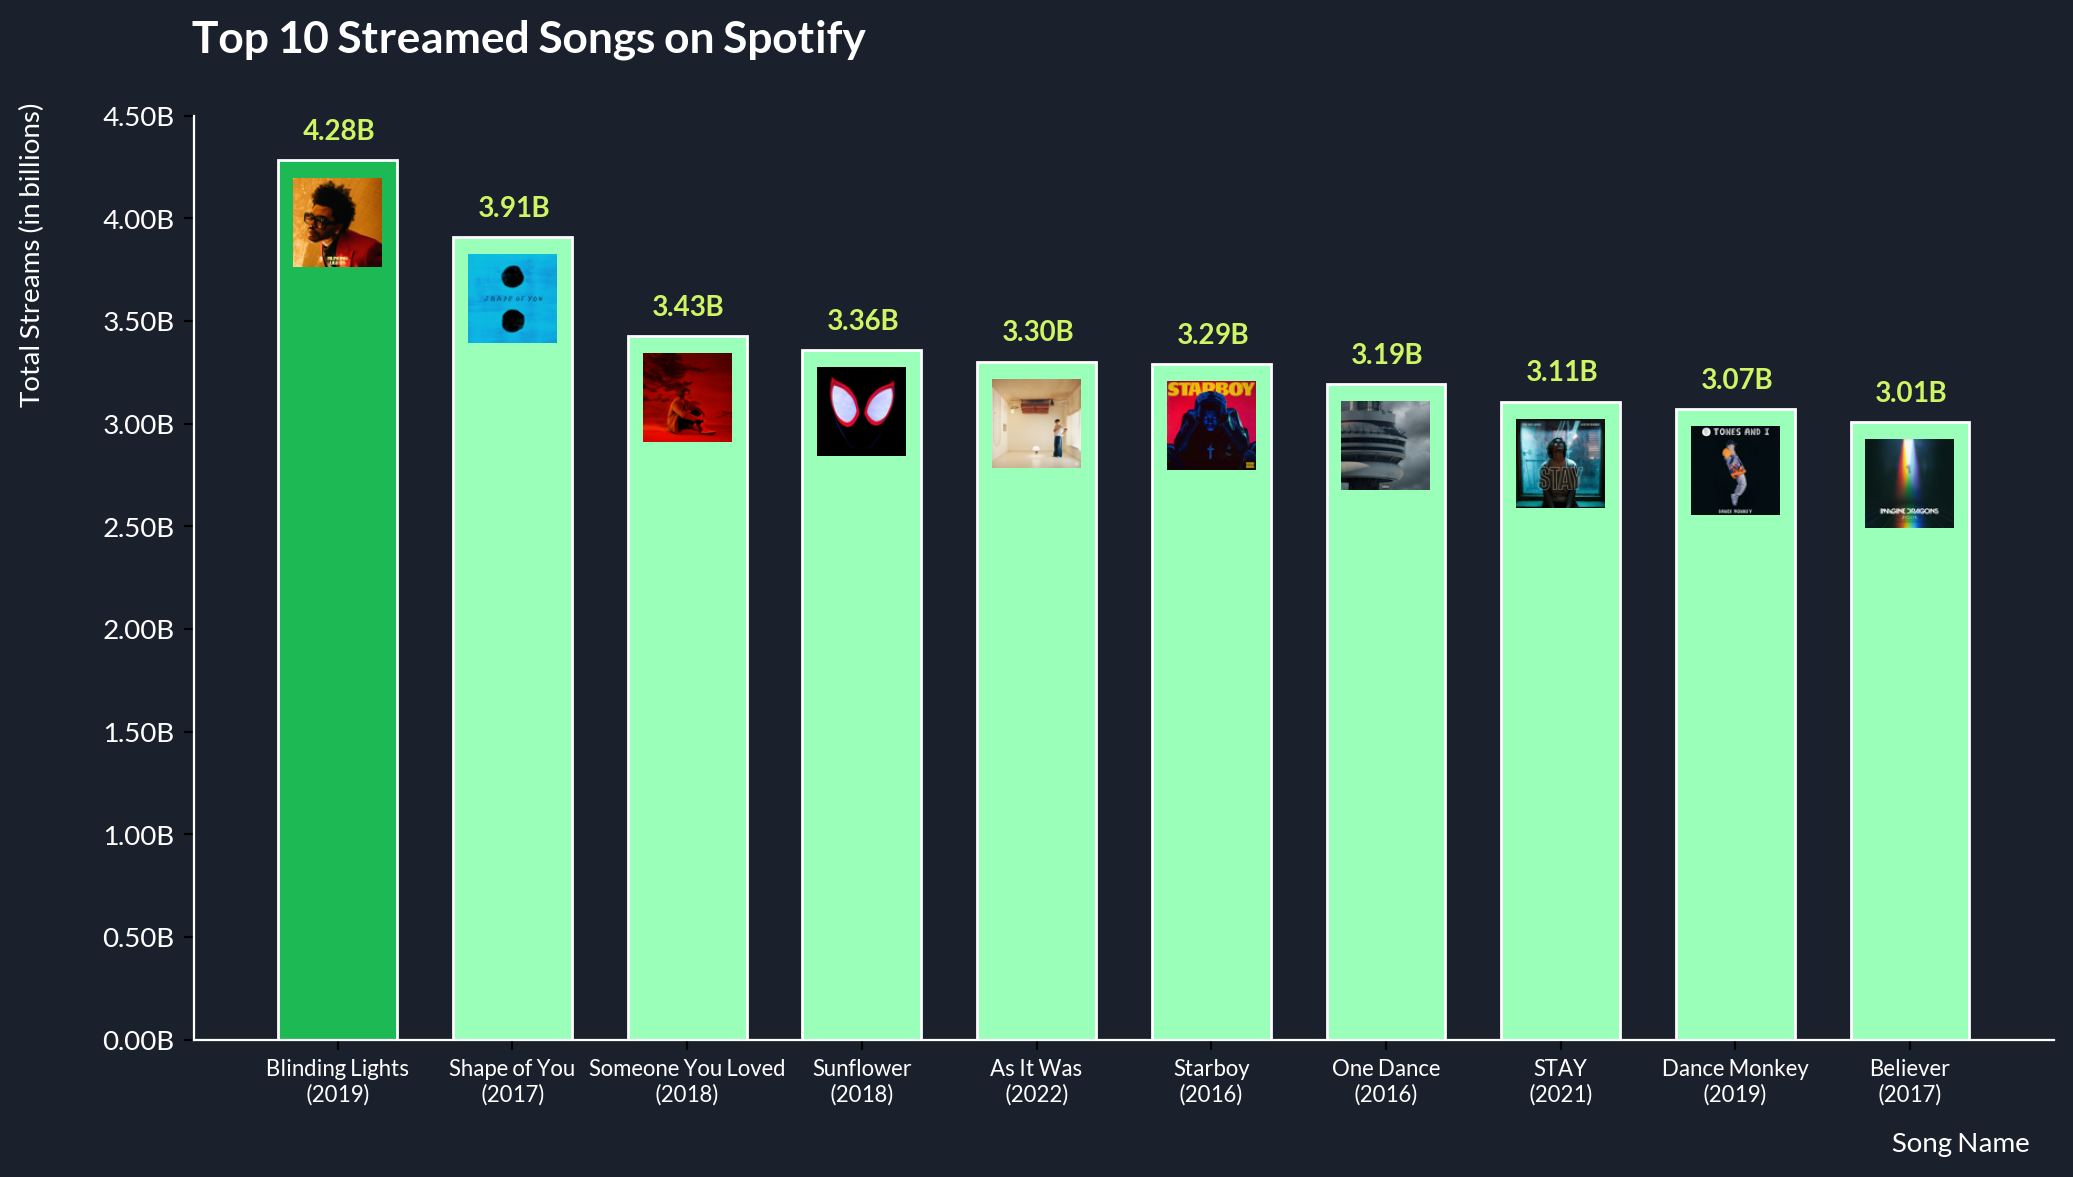

In [1226]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x_top_songs, top_songs_stream, width=0.68, color=[colors[0] if i == 0 else colors[1] for i, v in enumerate(top_songs_stream)], edgecolor='white')

for i, label in enumerate(range(len(top_songs_stream))):
    ax.annotate(f"{top_songs_stream.iloc[i]:.2f}B", (i-0.2, top_songs_stream.iloc[i]+0.1), size=10, annotation_clip=False, color='#cdf564', fontweight='bold')

images = ['./songs/blinding_lights.jpeg', './songs/shape_of_you.jpeg', './songs/someone_you_loved.jpeg', './songs/sunflower.jpeg', './songs/as_it_was.jpeg', './songs/starboy.jpeg', './songs/one_dance.jpeg', './songs/stay.jpeg', './songs/dance_monkey.jpeg', './songs/believer.jpeg']
for i, image in enumerate(images):
    img = plt.imread(image)
    img = np.array(Image.open(image).resize((80, 80)))
    imagebox = OffsetImage(img, zoom=0.4)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (i, top_songs_stream.iloc[i] - 0.3), frameon=False)
    ax.add_artist(ab)

ax.set_xlabel('Song Name', color='white')
ax.set_xticks(x_top_songs)
ax.set_xticklabels([f"{track}\n({year})" for track, year in zip(top_songs['Track'], top_songs['Release Year'])], color='white', fontsize=8)
ax.set_ylabel('Total Streams (in billions)', color='white')
y = np.arange(0, 4.6, 0.5)
ax.set_yticks(y)
ax.set_yticklabels([f"{num:.2f}B" for num in y], color='white')
ax.set_title('Top 10 Streamed Songs on Spotify', color='white', fontsize=16, fontweight='bold', x=0.18, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.95, -0.1)
ax.yaxis.set_label_coords(-0.08, 0.85)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
fig.savefig('top_10_songs.png', dpi=300, bbox_inches='tight')
plt.show()

In [1227]:
# Top 10 Streamed Artists on Spotify

In [1228]:
df_spotify_artists = df_spotify.groupby('Artist')['Spotify Streams'].sum()
df_spotify_artists = df_spotify_artists.sort_values(ascending=False)
top_artists = df_spotify_artists.iloc[0:11]/1000000000
top_artists = top_artists.drop('MUSIC LAB JPN')
x_top_artists = np.arange(len(top_artists))
top_artists

Artist
Bad Bunny        37.05483
The Weeknd       36.94854
Drake            34.96216
Taylor Swift     34.47077
Post Malone      26.13747
Ed Sheeran       24.01490
Ariana Grande    23.46499
Olivia Rodrigo   19.72922
Eminem           18.87888
Harry Styles     17.35339
Name: Spotify Streams, dtype: float64

In [1229]:
emerging = df_spotify_artists[(df_spotify_artists >= 0) & (df_spotify_artists < 100000000)]
rising = df_spotify_artists[(df_spotify_artists >= 100000000) & (df_spotify_artists < 1000000000)]
stars = df_spotify_artists[(df_spotify_artists >= 1000000000) & (df_spotify_artists < 10000000000)]
goat = df_spotify_artists[(df_spotify_artists >= 10000000000)]
artists = [len(emerging), len(rising), len(stars), len(goat)]
pie_colors = ['#006451', '#4b917d', colors[0], '#62d089']
labels = ['Emerging Artists\n(Less than 100M)', 'Rising Stars\n(Between 100M and 1B)', 'Superstars\n(Between 1M and 10B)', 'Greatest of All Time\n(More than 10B)']

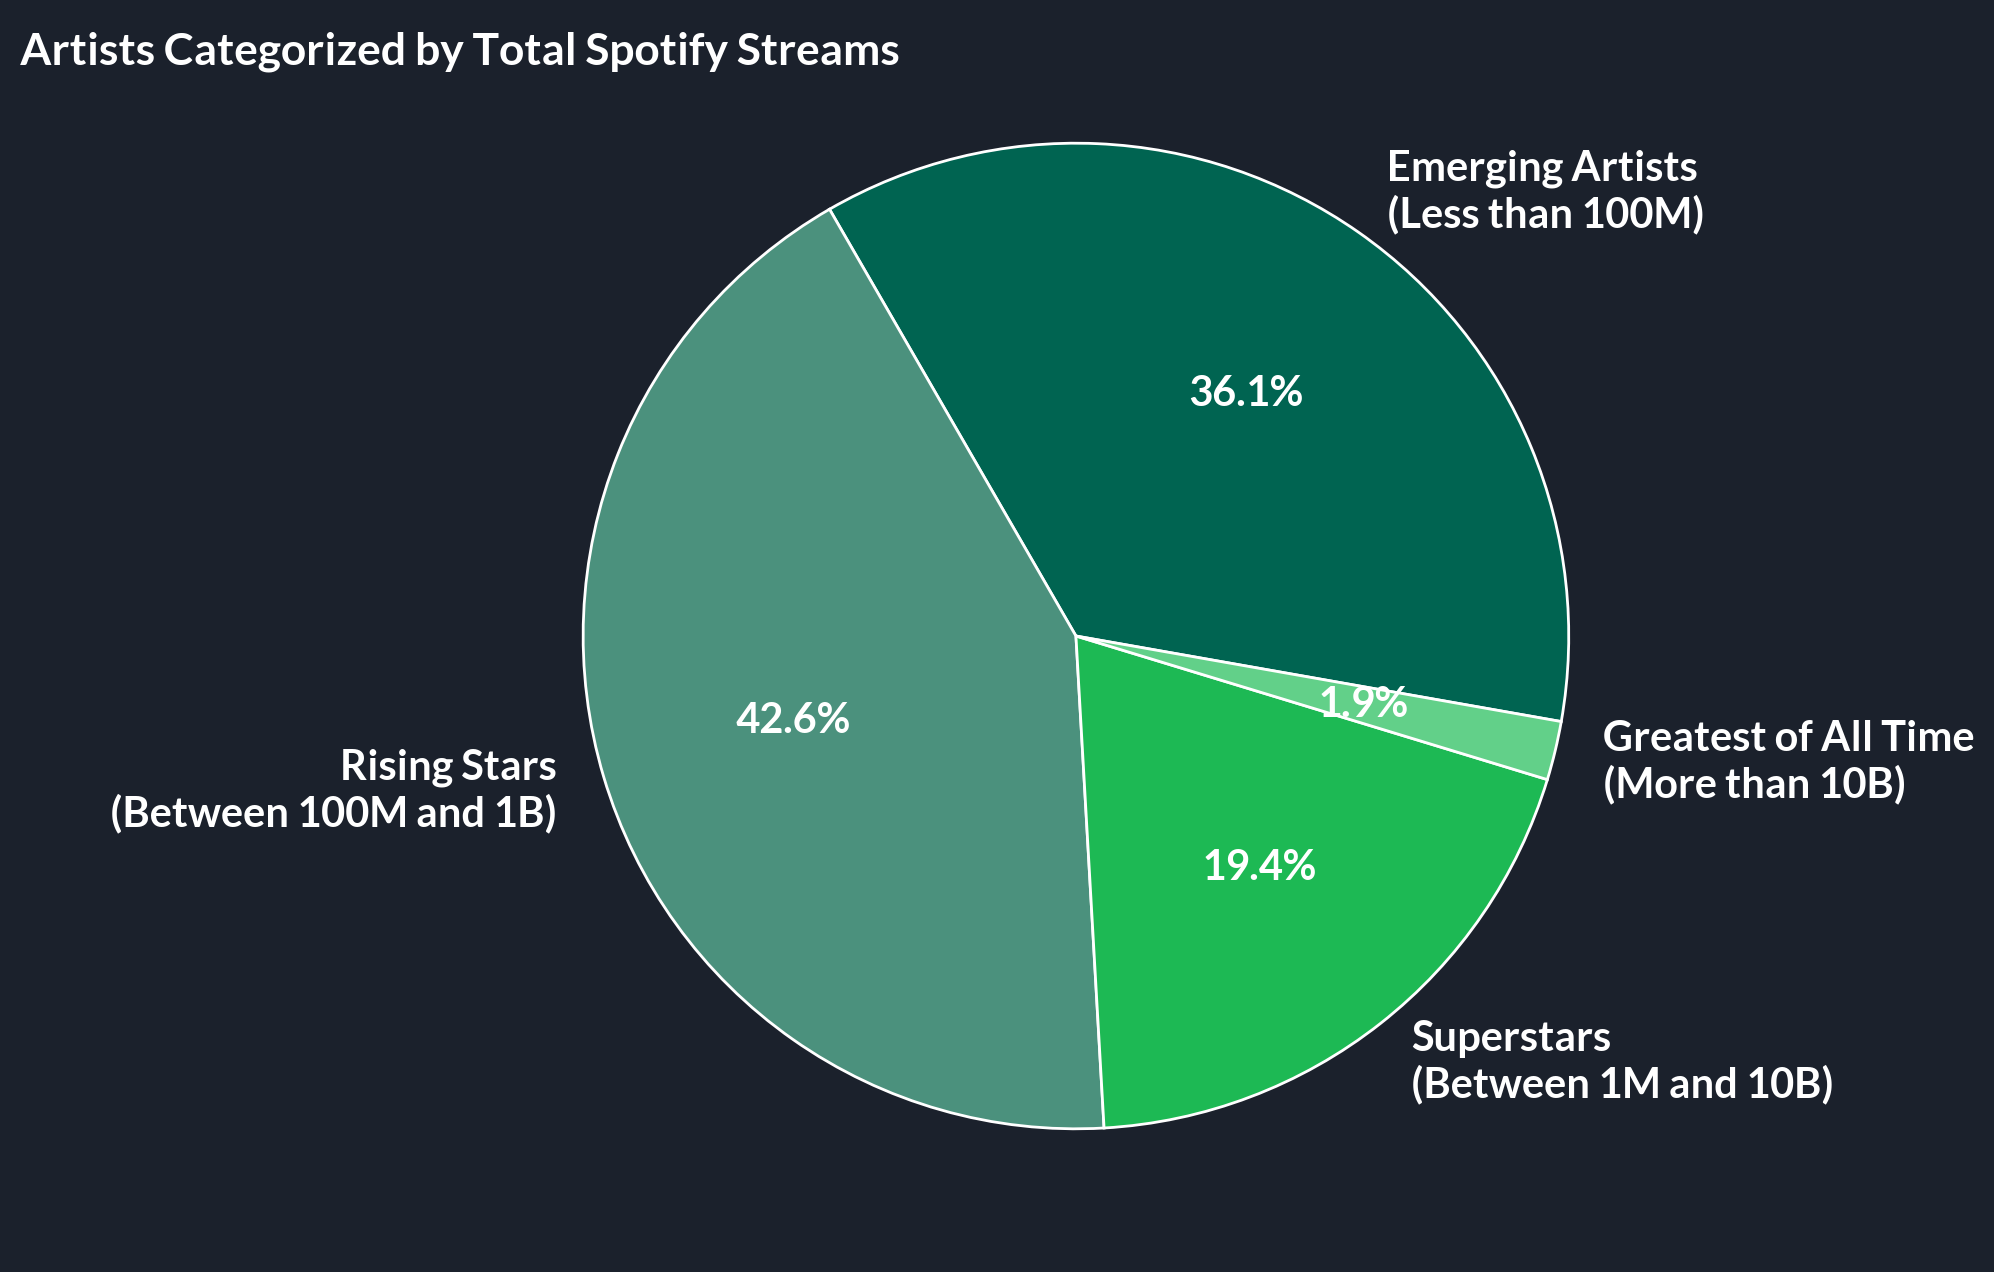

In [1230]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(artists, colors=pie_colors, labels=labels, autopct='%1.1f%%', startangle=350, textprops={'fontsize': 15, 'color': 'white', 'fontweight': 'bold'}, wedgeprops={'edgecolor': 'white'})

ax.set_title('Artists Categorized by Total Spotify Streams', color='white', fontsize=16, fontweight='bold', x=0, y=0.95)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
fig.savefig('artist_pie.png', dpi=300, bbox_inches='tight')
plt.show()

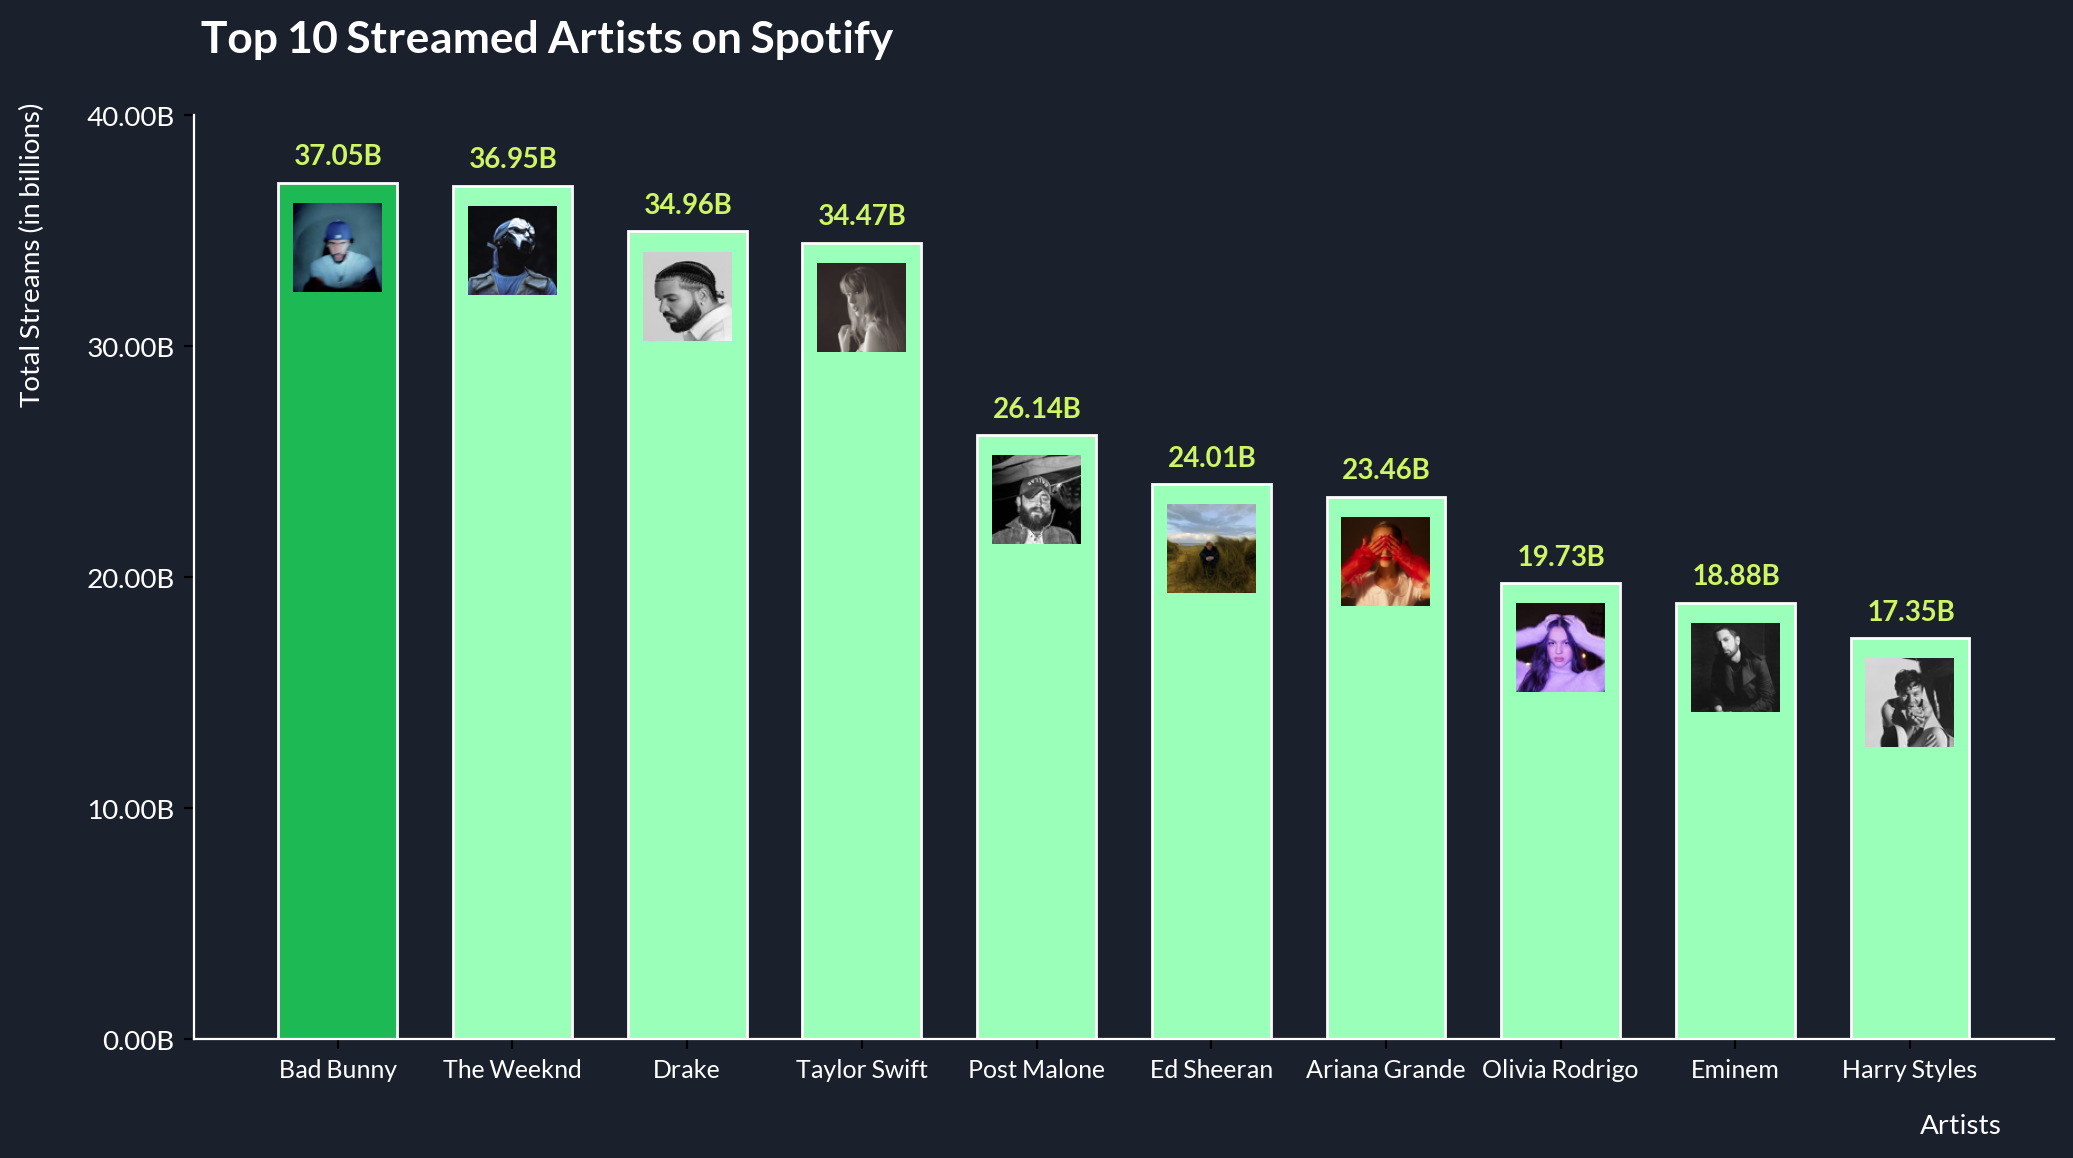

In [1231]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x_top_artists, top_artists, width=0.68, color=[colors[0] if i == 0 else colors[1] for i, v in enumerate(top_artists)], edgecolor='white')

for i, label in enumerate(range(len(top_artists))):
    ax.annotate(f"{top_artists.iloc[i]:.2f}B", (i-0.25, top_artists.iloc[i]+0.8), size=10, annotation_clip=False, color='#cdf564', fontweight='bold')

images = ['./artists/bad_bunny.jpeg', './artists/the_weeknd.jpeg', './artists/drake.jpeg', './artists/taylor_swift.jpeg', './artists/post_malone.jpeg', './artists/ed_sheeran.jpeg', './artists/ariana_grande.jpeg', './artists/olivia_rodrigo.jpeg', './artists/eminem.jpeg', './artists/harry_styles.jpeg']
for i, image in enumerate(images):
    img = plt.imread(image)
    img = np.array(Image.open(image).resize((80, 80)))
    imagebox = OffsetImage(img, zoom=0.4)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (i, top_artists.iloc[i] - 2.8), frameon=False)
    ax.add_artist(ab)

ax.set_xlabel('Artists', color='white')
ax.set_xticks(x_top_artists)
ax.set_xticklabels(top_artists.keys(), color='white', fontsize=9)
ax.set_ylabel('Total Streams (in billions)', color='white')
y = np.arange(0, 41, 10)
ax.set_yticks(y)
ax.set_yticklabels([f"{num:.2f}B" for num in y], color='white')
ax.set_title('Top 10 Streamed Artists on Spotify', color='white', fontsize=16, fontweight='bold', x=0.19, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.95, -0.08)
ax.yaxis.set_label_coords(-0.08, 0.85)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
fig.savefig('top_10_artist.png', dpi=300, bbox_inches='tight')
plt.show()

In [1232]:
# Yearly Users
mau = pd.Series([208,271,345,406,489,602,626])
mau

0    208
1    271
2    345
3    406
4    489
5    602
6    626
dtype: int64

In [1233]:
sub = pd.Series([96,124,155,180,205,236,246])
sub

0     96
1    124
2    155
3    180
4    205
5    236
6    246
dtype: int64

In [1234]:
x_mau = np.arange(len(mau))

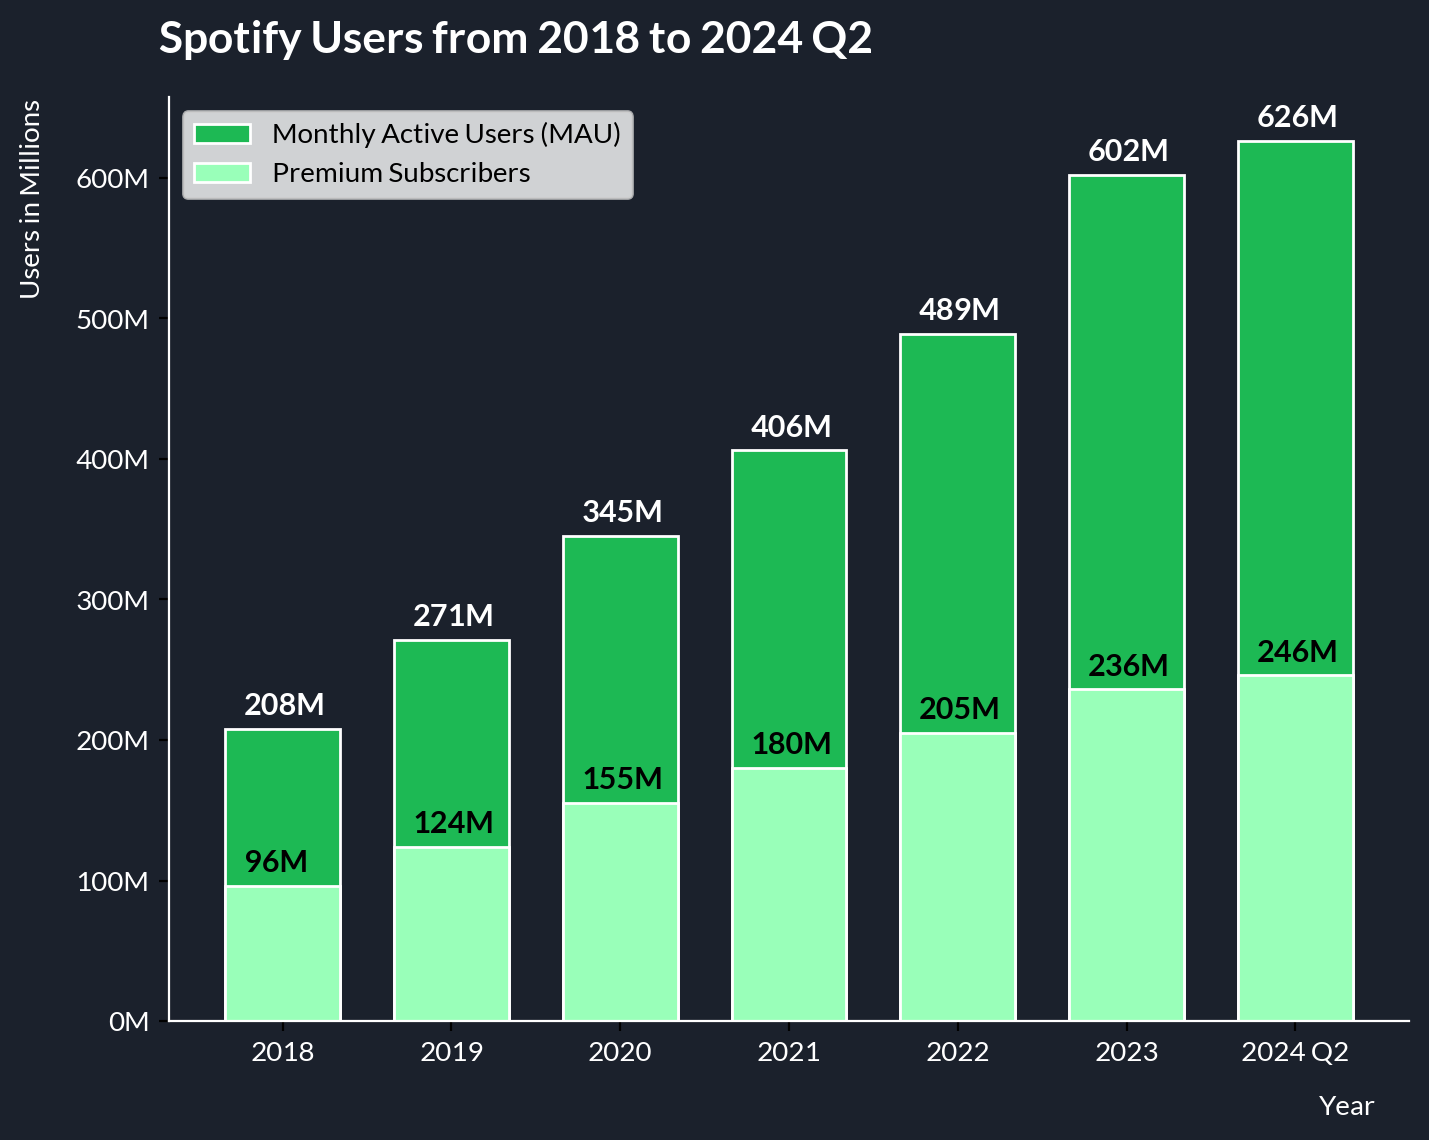

In [1235]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x_mau, mau, width=0.68, label='Monthly Active Users (MAU)', color='#1DB954', edgecolor='white')
ax.bar(x_mau, sub, width=0.68, label='Premium Subscribers', color='#99FFB9', edgecolor='white')

for i, label in enumerate(range(len(mau))):
    ax.annotate(f"{mau.iloc[i]}M", (i-0.23, mau.iloc[i]+10), size=11, annotation_clip=False, color='white', weight='bold')
    ax.annotate(f"{sub.iloc[i]}M", (i-0.23, sub.iloc[i]+10), size=11, annotation_clip=False, color='black', weight='bold')

ax.set_xlabel('Year', color='white')
ax.set_xticks(x_mau)
ax.set_xticklabels([2018,2019,2020,2021,2022,2023,'2024 Q2'], color='white')
ax.set_ylabel('Users in Millions', color='white')
ax.set_yticks(np.arange(0, 700, 100))
ax.set_yticklabels(['0M', '100M', '200M', '300M', '400M', '500M', '600M'], color='white')
ax.set_title('Spotify Users from 2018 to 2024 Q2', color='white', fontsize=16, fontweight='bold', x=0.28, y=1.03)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.95, -0.08)
ax.yaxis.set_label_coords(-0.1, 0.89)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
plt.legend()
fig.savefig('Spotify_Users.png', dpi=300, bbox_inches='tight')
plt.show()